# Cloud computing

In [1]:
# Load required packages
using CSV, DataFrames #Data packages
using JuMP, Gurobi #Optimization packages
using Makie, CairoMakie #Visualization packages
Makie.inline!(true); #make sure it shows in the notebook

## Part a: Please see the written document.

## Part b:

Variable definitions:

1. `energy::Matrix{Float64}` a 1000x20 matrix. `energy[i,j]` indicates the energy consumption for job `i` machine `j`.
2. `capacity::Vector{Float64}` a 20 vector. `capacity[ij` indicates the capacity of machine `j`.

In [2]:
#Dataframe should be ok for now.
energy = Matrix(CSV.read("HW2_data//energy.csv", DataFrame)[:, 2:end]);
capacity = Matrix(CSV.read("HW2_data//capacity.csv", DataFrame)[:,2:end]);

Inspect the loaded matrices

In [3]:
all_const = [energy, capacity];
name_set = ["energy", "capacity"]
for i in eachindex(all_const)
    println(name_set[i],": " ,size(all_const[i]))
end

E: (1000, 20)
C: (20, 1)


In [4]:
modelB1 = Model(Gurobi.Optimizer); # Builds Gurobi model

# Define the variables
@variable(modelB1, X1[1:1000, 1:20] ≥ 0, Bin);

# Define the objective
@objective(modelB1, Min, sum(energy.*X1));

# Each job has to got assigned once.
@constraint(modelB1, [i = 1:1000], sum(X1[i,:]) == 1);

# Each machine can only handle limited number of jobs
@constraint(modelB1, [j = 1:20], sum(X1[:,j]) ≤ capacity[j]);

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06


In [5]:
optimize!(modelB1); # Optimize model
@show is_solved_and_feasible(modelB1);

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 1020 rows, 20000 columns and 40000 nonzeros
Model fingerprint: 0x81f81880
Variable types: 0 continuous, 20000 integer (20000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+00, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 49453.678476
Presolve time: 0.04s
Presolved: 1020 rows, 20000 columns, 40000 nonzeros
Variable types: 0 continuous, 20000 integer (20000 binary)

Root relaxation: objective 4.141651e+04, 1369 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    41416.507432 41416.5074  0.00%     -    

In [6]:
println("b.(i) Optimal Energy Consumption: $(objective_value(modelB1))")

b.(i) Optimal Energy Consumption: 41416.507432447295


In [7]:
# make a model where there is no capacity constraints
modelB2 = Model(Gurobi.Optimizer); # Builds Gurobi model

# Define the variables
@variable(modelB2, X2[1:1000, 1:20] ≥ 0, Bin);

# Define the objective
@objective(modelB2, Min, sum(energy.*X2));

# Each job has to got assigned once.
@constraint(modelB2, [i = 1:1000], sum(X2[i,:]) == 1);

optimize!(modelB2); # Optimize model
@show is_solved_and_feasible(modelB2);

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 1000 rows, 20000 columns and 20000 nonzeros
Model fingerprint: 0x6c40c129
Variable types: 0 continuous, 20000 integer (20000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+00, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 49898.787470
Presolve removed 1000 rows and 20000 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.01 work units)
Thread count was 1 (of 10 available processors)

Solution count 2: 40883.2 49898.8 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.088316110700e+04, best bound 

In [35]:
println("b.(ii) Optimal Energy Consumption if there is no capacity: $(objective_value(modelB2))")

b.(ii) Optimal Energy Consumption if there is no capacity: 40883.161107001426


In [19]:
assignment = value.(X1);
a,b = findmin(energy, dims = 2);
minimum_assigned = sum(assignment[b]);
println("b.(iii)")
println("The number of jobs that are not (fully) assigned to their machines with the lowest energy consumption: $(1000-minimum_assigned)")

assignment2 = value.(X2);
a,b = findmin(energy, dims = 2);
minimum_assigned = sum(assignment2[b]);
println("[No limit case]The number of jobs that are not (fully) assigned to their machines with the lowest energy consumption: $(1000-minimum_assigned)")

b.(iii)
The number of jobs that are not (fully) assigned to their machines with the lowest energy consumption: 386.0
[No limit case]The number of jobs that are not (fully) assigned to their machines with the lowest energy consumption: 0.0


## Part c: Please see the written document.
## Part d: Please see the written document.

## Part e:

In [21]:
#Dataframe should be ok for now.
utilization = Matrix(CSV.read("HW2_data//utilization.csv", DataFrame)[:, 2:end]);
maxutil = Matrix(CSV.read("HW2_data//maxutil.csv", DataFrame)[:,2:end]);

In [22]:
all_const = [utilization, maxutil];
name_set = ["utilization", "maxutil"]
for i in eachindex(all_const)
    println(name_set[i],": " ,size(all_const[i]))
end

utilization: (1000, 20)
maxutil: (20, 1)


In [39]:
maxutil

20×1 Matrix{Float64}:
 1170.6530507150087
 1356.7292590989266
  774.6407399067323
  583.42002453427
  806.3621979348665
  327.14308351538904
 3895.1172973703497
  591.3964093287686
 1968.62736382538
  376.4551601091232
 1964.1195955088235
  754.0803116165797
 3820.865117789083
  317.8379429234617
 1939.650469596368
  714.5178536320536
 1460.1424978957966
 1986.400958382396
  290.124209071122
 4947.224624995945

In [89]:
modelE1 = Model(Gurobi.Optimizer); # Builds Gurobi model

# Define the variables
@variable(modelE1, 1 ≥ X1[1:1000, 1:20] ≥ 0);

# Define the objective
@objective(modelE1, Min, sum(energy.*X1));

# Each job has to got assigned at least once.
@constraint(modelE1, c1[i = 1:1000], sum(X1[i,:]) ≥ 1 );

# Each machine can only handle limited number of jobs
@constraint(modelE1, c2[j = 1:20], sum(utilization[:,j].*X1[:,j]) ≤ maxutil[j]);

optimize!(modelE1); # Optimize model
@show is_solved_and_feasible(modelE1);

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 1020 rows, 20000 columns and 40000 nonzeros
Model fingerprint: 0x9653dfb0
Coefficient statistics:
  Matrix range     [1e+00, 9e+02]
  Objective range  [7e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+03]
Presolve time: 0.01s
Presolved: 1020 rows, 20000 columns, 40000 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.000e+04
 Factor NZ  : 2.168e+04 (roughly 9 MB of memory)
 Factor Ops : 4.729e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    

In [90]:
println("e.(i) Optimal Energy Consumption: $(objective_value(modelE1))")

e.(i) Optimal Energy Consumption: 46693.57908506734


In [91]:
modelE2 = Model(Gurobi.Optimizer); # Builds Gurobi model

# Define the variables
@variable(modelE2, 1 ≥ X2[1:1000, 1:20] ≥ 0);

# Define the objective
@objective(modelE2, Min, sum(energy.*X2));

# Each job has to got assigned at least once.
@constraint(modelE2, c1[i = 1:1000], sum(X2[i,:]) ≥ 1 );

# Each machine can only handle limited number of jobs
# @constraint(modelE2, c2[j = 1:20], sum(utilization[:,j].*X2[:,j]) ≤ maxutil[j]);

optimize!(modelE2); # Optimize model
@show is_solved_and_feasible(modelE2);
println("e.(ii) Optimal Energy Consumption without utilization capacity: $(objective_value(modelE2))")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 1000 rows, 20000 columns and 20000 nonzeros
Model fingerprint: 0xe8468afd
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1000 rows and 20000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0883161e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.01 work units)
Optimal objective  4.088316111e+04

User-callback calls 38, time in user-callback 0.00 sec
is_solved_and_feasible(modelE2) = true
e.(ii) Optimal Energy Consumption without

In [99]:
assignment = value.(X1); #assignment result
a,b = findmin(energy, dims = 2); #find the value and the location of the job allocation.
machine_energy = sum(energy.*assignment, dims = 2); #find the energy used for each machine.
minimum_assigned = sum(machine_energy .== a); #find the number of machines that has used the minimum energy.
println("e.(iii)")
println("The number of jobs that are not (fully) assigned to their machines with the lowest energy consumption: $(1000-minimum_assigned)")

assignment2 = value.(X2);
a,b = findmin(energy, dims = 2);
minimum_assigned = sum(assignment2[b]);
println("[No limit case]The number of jobs that are not (fully) assigned to their machines with the lowest energy consumption: $(1000-minimum_assigned)")

e.(iii)
The number of jobs that are not (fully) assigned to their machines with the lowest energy consumption: 885
[No limit case]The number of jobs that are not (fully) assigned to their machines with the lowest energy consumption: 0.0


Plotting

size(dual_variables) = (20,)
size(maxutil) = (20, 1)


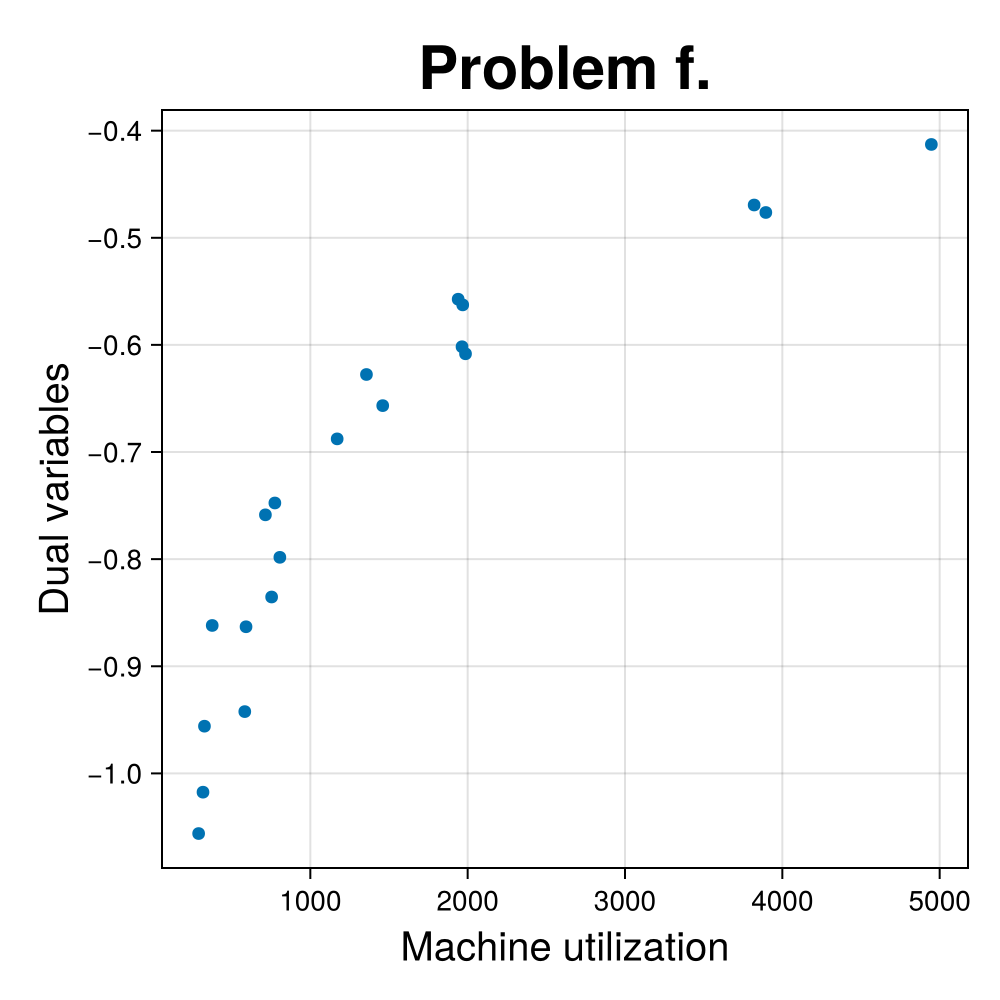

CairoMakie.Screen{IMAGE}


In [114]:
f1 = Figure(size = (500,500))
dual_variables = dual.(c2) ; 
@show size(dual_variables) 
@show size(maxutil)
ax1 = Axis(f1[1,1], title = "Problem f.", titlesize = 30, 
xlabel = "Machine utilization", ylabel = "Dual variables",
xlabelsize = 20, ylabelsize = 20)
scatter!(ax1, vec(maxutil), dual_variables )
display(f1)
save("problem-f.png",f1)

In [ ]:
dual(c1)